**Tarea 1 Módulo 1 - Análisis de Datos 2022-1**


1. Una imagen es un arreglo de datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns

In [8]:
from google.colab import files
uploaded= files.upload()

Saving Atardecer.webp to Atardecer.webp


In [9]:
!ls

Atardecer.webp	sample_data


In [10]:
mi_imagen=cv.imread("Atardecer.webp")

In [11]:
np.shape(mi_imagen)

(799, 1200, 3)

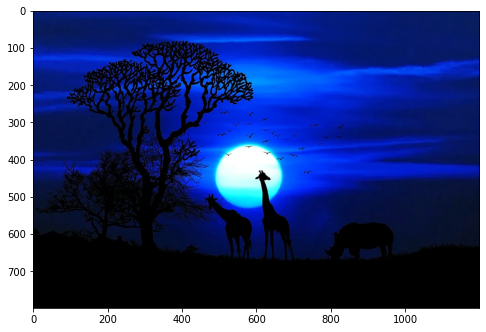

In [13]:
plt.figure(figsize=(8,9))
plt.imshow(mi_imagen)
plt.show()

In [14]:
from skimage import io, color

In [15]:
img2=cv.cvtColor(mi_imagen,cv.COLOR_BGR2RGB)


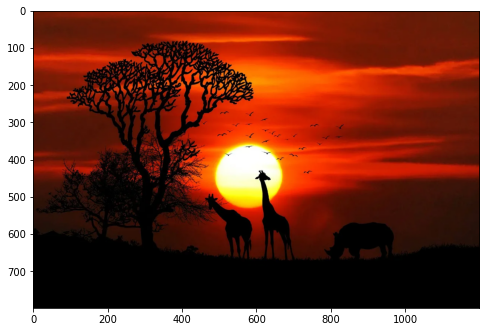

In [16]:
plt.figure(figsize=(8,9))
plt.imshow(img2)
plt.show()

1.1. Construya un arreglo de estas componentes en un solo (otro) arreglo de datos.


In [17]:
r,g,b=cv.split(img2)

In [18]:
r

array([[106, 106, 106, ...,  96,  96,  96],
       [106, 106, 106, ...,  96,  96,  96],
       [106, 106, 106, ...,  96,  96,  96],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [19]:
g

array([[32, 32, 32, ..., 29, 29, 29],
       [32, 32, 32, ..., 29, 29, 29],
       [32, 32, 32, ..., 29, 29, 29],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [20]:
b

array([[9, 9, 9, ..., 8, 8, 8],
       [9, 9, 9, ..., 8, 8, 8],
       [9, 9, 9, ..., 8, 8, 8],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

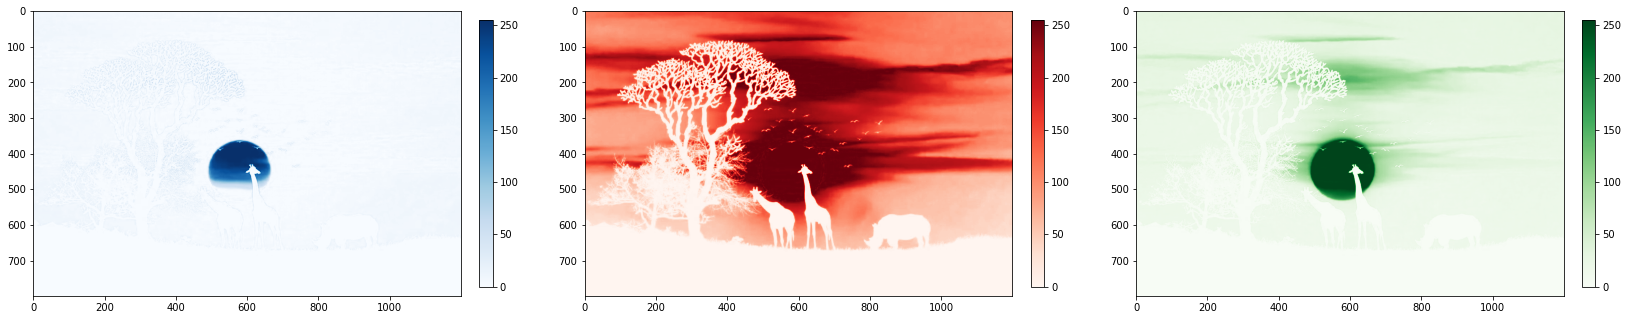

In [23]:
plt.figure(figsize=(28,19))
plt.subplot(131)
im=plt.imshow(b,cmap="Blues")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(132)
im=plt.imshow(r,cmap="Reds")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.subplot(133)
im=plt.imshow(g,cmap="Greens")
plt.colorbar(im,fraction=0.029, pad=0.04)
plt.show()

In [24]:
b1=b.ravel()
r1=r.ravel()
g1=g.ravel()

2. Calcule para cada arreglo las medidas de tendencia central, las medidas de dispersión y las medidas de simetría correspondientes, también las medida de variabilidad o coeficiente de variabilidad o coeficiente de Pearson. Diga si las medidas son robustas o no.

In [25]:
from scipy import stats

In [26]:

print("la media del color Azul es", np.round(np.mean(b1)))
print("la media del color Rojo es", np.round(np.mean(r1)))
print("la media del color Verde es", np.round(np.mean(g1)))

print("La mediana del color Azul es", np.median(b1))
print("La mediana del color Rojo es", np.median(r1))
print("La mediana del color Verde es", np.median(g1))

la media del color Azul es 8.0
la media del color Rojo es 98.0
la media del color Verde es 27.0
La mediana del color Azul es 3.0
La mediana del color Rojo es 95.0
La mediana del color Verde es 21.0


In [27]:
stats.mode(b1)

ModeResult(mode=array([0], dtype=uint8), count=array([332789]))

La moda del color Azul es 0.

In [28]:
stats.mode(r1)

ModeResult(mode=array([0], dtype=uint8), count=array([206588]))

La moda del color Rojo es 0.

In [29]:
stats.mode(g1)

ModeResult(mode=array([0], dtype=uint8), count=array([231320]))

La moda del color Verde es 0.

In [30]:
print("MEDIDAS DE DISPERSION")
print("la desviasion estandar del color Azul es", np.round(np.std(b1)))
print("la desviasion estandar del color Rojo es", np.round(np.std(r1)))
print("la desviasion estandar del color Verde es", np.round(np.std(g1)))

MEDIDAS DE DISPERSION
la desviasion estandar del color Azul es 29.0
la desviasion estandar del color Rojo es 85.0
la desviasion estandar del color Verde es 41.0


In [31]:
np.round(stats.kurtosis(b1),2)

53.42

In [32]:
np.round(stats.kurtosis(r1),2)

-1.09

In [33]:
np.round(stats.kurtosis(g1),2)

17.43

La curtosis del color azul es 53.42

La curtosis del color rojo es -1.09

La curtosis del color verde es 17.43

In [34]:
np.round(stats.skew(b1),2)

7.22

La asimetria del color azul es positiva y es igual a 7.22.

In [35]:
np.round(stats.skew(r1),2)

0.4

La asimetria del color rojo es positiva sin embargo muy cercana al cero, lo cual significa que su districución es simetrica. 

In [36]:
np.round(stats.skew(g1),2)

3.88

La asimetria del color verde es positiva y es igual a 3.88.

In [37]:
print("COEFICIENTE DE VARIABILIDAD")
print("El coeficiente de variabilidad del color Azul es ", np.round(np.std(b1)/np.mean(b1),2))
print("El coeficiente de variabilidad del color Rojo es ", np.round(np.std(r1)/np.mean(r1),2))
print("El coeficiente de variabilidad del color Verde es ", np.round(np.std(g1)/np.mean(g1),2))

COEFICIENTE DE VARIABILIDAD
El coeficiente de variabilidad del color Azul es  3.74
El coeficiente de variabilidad del color Rojo es  0.87
El coeficiente de variabilidad del color Verde es  1.51


1.3. Haga un histograma de cada componente

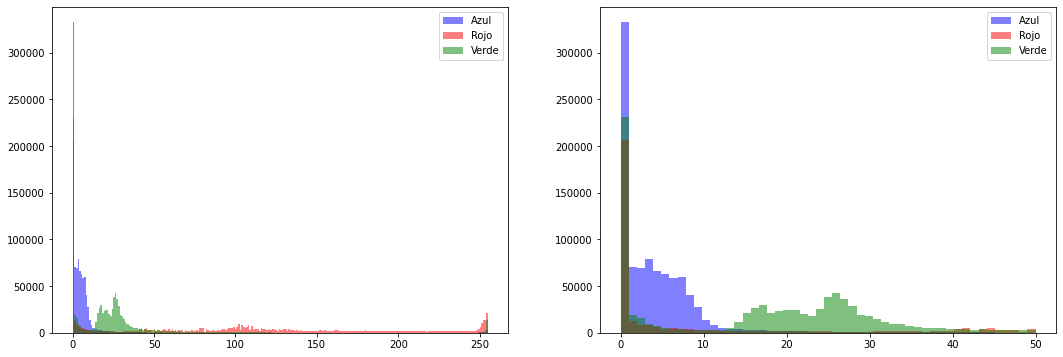

In [38]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(b1,bins=256,label="Azul", color="b", alpha=0.5)
plt.hist(r1,bins=256,label="Rojo", color="r", alpha=0.5)
plt.hist(g1,bins=256,label="Verde", color="g", alpha=0.5)
plt.legend()

plt.subplot(122)
plt.hist(b1,bins=51,range= (0,50),label="Azul", color="b", alpha=0.5)
plt.hist(r1,bins=51,range= (0,50),label="Rojo", color="r", alpha=0.5)
plt.hist(g1,bins=51,range= (0,50),label="Verde", color="g", alpha=0.5)
plt.legend()

plt.show()

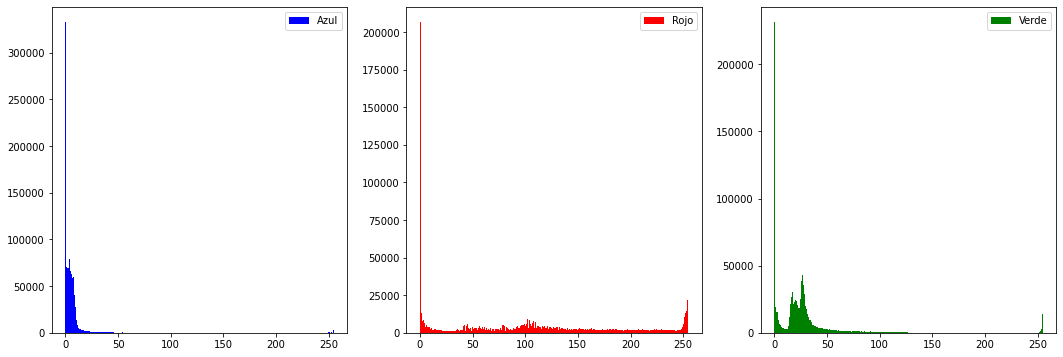

In [39]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.hist(b1,bins=256,label="Azul", color="b")
plt.legend()

plt.subplot(132)
plt.hist(r1,bins=256,label="Rojo", color="r")
plt.legend()

plt.subplot(133)
plt.hist(g1,bins=256,label="Verde", color="g")
plt.legend()

plt.show()

Conforme a la información que brindan los histogramas para cada uno de las variables, asi como los resultados obtenidos por las mediadas de tendencia central, las medidas de dispersion y las medidas de simetia podemos concluir que para los tres colores la districución es unimodal, lo cual se evidencia con los valores obtenidos para las modas, y la barra que alcanza mas elevación en cada uno de los tres histogramas en cero. 
En cuanto a asimetria, los colores azul y verde presentan un coeficiente de asimetria positico lo cual indica que estas variables se encuentran sesgados a la derecha, mientras que el color rojo presenta un coeficiente muy cercano a cero, por lo cual podemos inferir, que tiene una distribucion simetrica. 

En cuanto a la media de los datos, se puede decir que la mayoria de las intensidades se corresponden con 8 para el azul, 98 para el rojo y 28 para el verde. Ademas para el color azul, el 50% de los pixeles (479.400) son menores a 3, menores a 95 para el color rojo y 21 para el color verde. 

La desviacion estandar del color azul corresponde a 29, lo cual siguiere que las intensidades mas probables estaran en los intervalos (x-σ, x+σ) es decir, entre 0 y 37. Por su parte las intensidades mas probables del color rojo entaran en el intervalo (13, 183) y para el color verde entre (0 y 68). 


1.4 Ahora suponga que la escala de cada color, la cual es un numero que va en el intervalo [0, 255] usted la divide en [”Claro”,”Medio”,”Oscuro”], bajo un criterio que usted elabore. Construya un nuevo arreglo con estos datos.

*   Escala Azul

In [40]:

b1_Oscuro=len(b1[(b1>=0)&(b1<(255/3))])
b1_Medio=len(b1[(b1>=(255/3))&(b1<((255/3)*2))])
b1_Claro=len(b1[(b1>=((255/3)*2))&(b1<256)])
b1_T= b1_Oscuro+b1_Medio+b1_Claro

Blue= {'Escala': ['Claros', 'Medio', "Oscuros"],
'Pixeles': [b1_Claro, b1_Medio, b1_Oscuro],
'Porcentaje': [(b1_Claro*100/b1_T), (b1_Medio*100/b1_T), (b1_Oscuro*100/b1_T)]}
DFb1_T = pd.DataFrame(Blue, columns=['Escala', 'Pixeles', 'Porcentaje'])
DFb1_T

,Escala,Pixeles,Porcentaje
0,Claros,14142,1.474969
1,Medio,2587,0.269816
2,Oscuros,942071,98.255215




*   Escala Roja



In [41]:
r1_Oscuro=len(r1[(r1>=0)&(r1<(255/3))])
r1_Medio=len(r1[(r1>=(255/3))&(r1<((255/3)*2))])
r1_Claro=len(r1[(r1>=((255/3)*2))&(r1<256)])
r1_T= r1_Oscuro+r1_Medio+r1_Claro

Red= {'Escala': ['Claros', 'Medio', "Oscuros"],
'Pixeles': [r1_Claro, r1_Medio, r1_Oscuro],
'Porcentaje': [(r1_Claro*100/r1_T), (r1_Medio*100/r1_T), (r1_Oscuro*100/r1_T)]}
DFr1_T = pd.DataFrame(Red, columns=['Escala', 'Pixeles', 'Porcentaje'])
DFr1_T

,Escala,Pixeles,Porcentaje
0,Claros,225374,23.505841
1,Medio,284283,29.649875
2,Oscuros,449143,46.844285




*   Escala Verde


In [42]:
g1_Oscuro=len(g1[(g1>=0)&(g1<(255/3))])
g1_Medio=len(g1[(g1>=(255/3))&(g1<((255/3)*2))])
g1_Claro=len(g1[(g1>=((255/3)*2))&(g1<256)])
g1_T= g1_Oscuro+g1_Medio+g1_Claro

Green= {'Escala': ['Claros', 'Medio', "Oscuros"],
'Pixeles': [g1_Claro, g1_Medio, g1_Oscuro],
'Porcentaje': [(g1_Claro*100/g1_T), (g1_Medio*100/g1_T), (g1_Oscuro*100/g1_T)]}
DFg1_T = pd.DataFrame(Green, columns=['Escala', 'Pixeles', 'Porcentaje'])
DFg1_T

,Escala,Pixeles,Porcentaje
0,Claros,23085,2.407697
1,Medio,29216,3.047142
2,Oscuros,906499,94.545161


1.5. Ahora haga un gráfico de torta y un gráfico de barras para visualizar el último arreglo que hizo.



*   Gráficos de torta



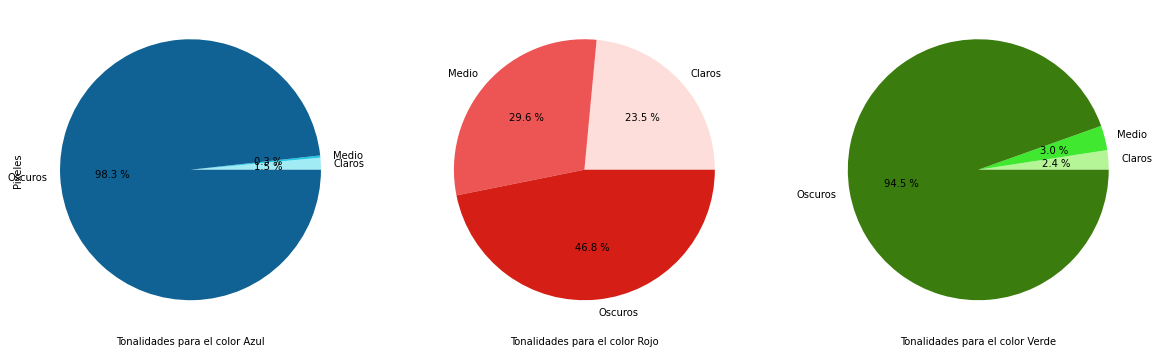

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.pie(Blue["Pixeles"], labels=Blue["Escala"],autopct="%0.1f %%", colors=["#a1ebf5", "#22c8e8", "#0f6293"])
plt.xlabel("Tonalidades para el color Azul")
plt.ylabel("Pixeles")

plt.subplot(132)
plt.pie(Red["Pixeles"], labels=Red["Escala"],autopct="%0.1f %%", colors=["#fddeda", "#ed5454", "#d51f16"])
plt.xlabel("Tonalidades para el color Rojo")


plt.subplot(133)
plt.pie(Green["Pixeles"], labels=Green["Escala"],autopct="%0.1f %%", colors=["#b5f497", "#40e92f", "#3a7c0d"])
plt.xlabel("Tonalidades para el color Verde")



plt.show()



*   Gráficos de barras



Text(0.5, 0, 'Tonalidades para el color Verde')

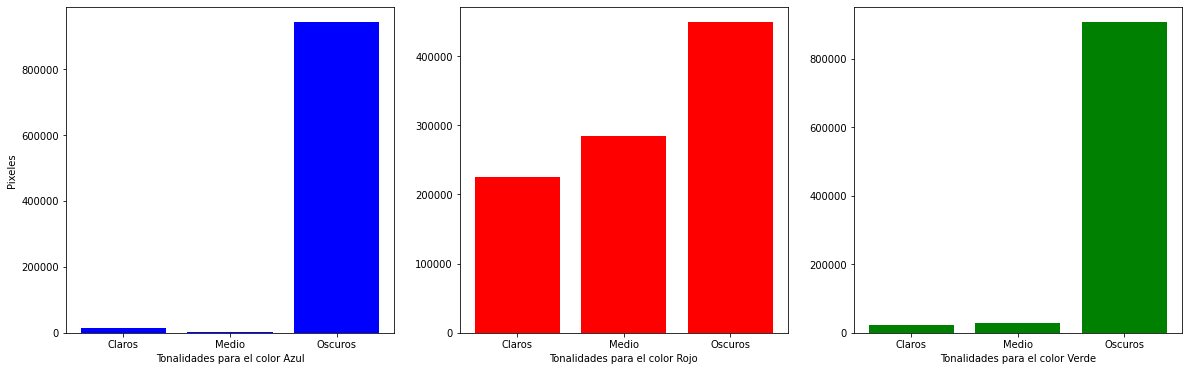

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.bar(Blue["Escala"],Blue["Pixeles"], color="b")

plt.xlabel("Tonalidades para el color Azul")
plt.ylabel("Pixeles")

plt.subplot(132)
plt.bar(Red["Escala"],Red["Pixeles"], color="r")
plt.xlabel("Tonalidades para el color Rojo")


plt.subplot(133)
plt.bar(Green["Escala"],Green["Pixeles"], color="g")
plt.xlabel("Tonalidades para el color Verde")

Finalmente, al realizar un analisis de los colores por escala, los graficos de torta y de barras, evidencian que en la imagen del Atardecer, la escala oscura es la mas prevalente, sobre todo para el caso de los colres azules y verdes, donde un gran porcentaje se concentra en los colores que van entre el intervalo [170-255].

Para el caso del color rojo, la distrución se muestra un poco mas uniforme entre las escalas, donde los tonos claros representan el 23.5% de la imagen del Atardecer, los medios el 29,6% y los tonos oscuros el 46.8%. 



**2 Asignación - Pandas, Pandas, Pandas. ¡La inmersión en los datos continúa! Héroes de Pymoli**

In [46]:
from google.colab import files 
uploaded=files.upload()

Saving Pandas.csv to Pandas.csv


In [47]:
names=["IDCompra", "Usuario","Edad","Genero","ID","NombreArticulo","Precio"]
df_csv=pd.read_csv("Pandas.csv", delimiter=";",skiprows=1,names=names)

In [48]:
df_csv

,IDCompra,Usuario,Edad,Genero,ID,NombreArticulo,Precio
0,0,Lisim78,20.0,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40.0,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,24.0,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,24.0,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,23.0,Male,131.0,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21.0,Female,60.0,Wolf,3.54
776,776,Iral74,21.0,Male,164.0,Exiled Doomblade,1.63
777,777,Yathecal72,20.0,Male,67.0,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7.0,Male,101.0,Final Critic,4.19


1. Recuento de jugadores

In [50]:
print("1. Recuento de jugadores")
print("El número total de jugadores es", len(df_csv["Usuario"].unique()))

1. Recuento de jugadores
El número total de jugadores es 576


2. Análisis de compras (total)

In [54]:
print("2. Análisis de compras (total)")
print("2.1 El número de artículos únicos vendidos fue", len(df_csv["ID"].unique()))
print("2.2 El precio medio de compra fue", np.round(df_csv["Precio"].mean(),2))
print("2.3 El número total de compras fue ", len(df_csv))
print("2.4 Los ingresos totales fueron", df_csv["Precio"].sum())

2. Análisis de compras (total)
2.1 El número de artículos únicos vendidos fue 183
2.2 El precio medio de compra fue 3.05
2.3 El número total de compras fue  780
2.4 Los ingresos totales fueron 2379.77


3. Datos demográficos por género

In [61]:
print("3.1 El número y porcentaje de jugadores masculinos corresponde a", len(np.unique(df_csv[df_csv["Genero"]=="Male"]["Usuario"])), 
      "y", np.round(len(np.unique(df_csv[df_csv["Genero"]=="Male"]["Usuario"]))/lenrecuento*100,2), "%, respectivamente.")

print("3.2 El número y porcentaje de jugadores femeninos corresponde a", len(np.unique(df_csv[df_csv["Genero"]=="Female"]["Usuario"])), 
      "y", np.round(len(np.unique(df_csv[df_csv["Genero"]=="Female"]["Usuario"]))/lenrecuento*100,2), "%, respectivamente.")

print("3.3 El número y porcentaje de jugadores otros/no revelados corresponde a", len(np.unique(df_csv[df_csv["Genero"]=="Other / Non-Disclosed"]["Usuario"])), 
      "y", np.round(len(np.unique(df_csv[df_csv["Genero"]=="Other / Non-Disclosed"]["Usuario"]))/lenrecuento*100,2),"%, respectivamente.")

3.1 El número y porcentaje de jugadores masculinos corresponde a 484 y 84.03 %, respectivamente.
3.2 El número y porcentaje de jugadores femeninos corresponde a 81 y 14.06 %, respectivamente.
3.3 El número y porcentaje de jugadores otros/no revelados corresponde a 11 y 1.91 %, respectivamente.


4. Análisis de compras (género). A continuación, cada uno de
ellos desglosado por género

In [63]:
print("4.1 Recueto de compras")
for i in np.unique(df_csv["Genero"]):
  print(i, df_csv[df_csv["Genero"]==i]["ID"].count())


4.1 Recueto de compras
Female 113
Male 652
Other / Non-Disclosed 15


In [64]:
print("4.2 Precio medio de compra")

for i in np.unique(df_csv["Genero"]):
  print(i, np.round(df_csv[df_csv["Genero"]==i]["Precio"].mean(),2))

4.2 Precio medio de compra
Female 3.2
Male 3.02
Other / Non-Disclosed 3.35


In [65]:
print("4.3 Valor total de las compras")
for i in np.unique(df_csv["Genero"]):
  print(i, np.round(df_csv[df_csv["Genero"]==i]["Precio"].sum(),2))


4.3 Valor total de las compras
Female 361.94
Male 1967.64
Other / Non-Disclosed 50.19


In [91]:
print("4.4 Valor medio de compras por persona, por género")
print("El valor medio de compras para los jugadores masculinos fue", round(df_csv[df_csv["Genero"]=="Male"]["Precio"].sum()/
                                                              (len(np.unique(df_csv[df_csv["Genero"]=="Male"]["Usuario"]))),2))
print("El valor medio de compras para las jugadoras femeninos fue", round(df_csv[df_csv["Genero"]=="Female"]["Precio"].sum()/
                                                              (len(np.unique(df_csv[df_csv["Genero"]=="Female"]["Usuario"]))),2))
print("El valor medio de compras para los jugadores otros/no revelados fue", round(df_csv[df_csv["Genero"]=="Other / Non-Disclosed"]["Precio"].sum()/
                                                              (len(np.unique(df_csv[df_csv["Genero"]=="Other / Non-Disclosed"]["Usuario"]))),2))


4.4 Valor medio de compras por persona, por género
El valor medio de compras para los jugadores masculinos fue 4.07
El valor medio de compras para las jugadoras femeninos fue 4.47
El valor medio de compras para los jugadores otros/no revelados fue 4.56


5. Datos demográficos por edad. A continuación, cada uno de ellos desglosado en franjas de 4 años (es decir, <10, 10-14, 15-19, etc.)


In [95]:
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
names = ["Menor de 10 Años", "De 10 a 14 Años", "De 15 a 19 Años", "De 20 a 24 Años", "De 25 a 29 Años", "De 30 a 34 Años", 
         "De 35 a 39 Años", "Mayores de 40 años"]
df_csv2=df_csv.copy()
df_csv2["Edad"] = pd.cut(df_csv2["Edad"], bins, labels = names)
df_csv2.head(5)

,IDCompra,Usuario,Edad,Genero,ID,NombreArticulo,Precio
0,0,Lisim78,De 20 a 24 Años,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,Mayores de 40 años,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,De 20 a 24 Años,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,De 20 a 24 Años,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,De 20 a 24 Años,Male,131.0,Fury,1.44


In [105]:
Redad=df_csv2.groupby("Edad",dropna=False).agg(Numero_Jugadores=("Usuario","nunique"),Numero_Compras=("Genero","count"),
                                               Precio_Medio=("Precio","mean"),Valor_Total=("Precio","sum"))

Redad["Valor_medio_jugadores"]=Redad["Valor_Total"]/Redad["Numero_Jugadores"]
Redad

,Numero_Jugadores,Numero_Compras,Precio_Medio,Valor_Total,Valor_medio_jugadores
Edad,,,,,
Menor de 10 Años,17,23,3.353478,77.13,4.537059
De 10 a 14 Años,22,28,2.956429,82.78,3.762727
De 15 a 19 Años,107,136,3.035956,412.89,3.858785
De 20 a 24 Años,258,365,3.052219,1114.06,4.318062
De 25 a 29 Años,77,101,2.900990,293.00,3.805195
De 30 a 34 Años,52,73,2.931507,214.00,4.115385
De 35 a 39 Años,31,41,3.601707,147.67,4.763548
Mayores de 40 años,12,13,2.941538,38.24,3.186667



6. Los que más gastan. Identifique a los 5 que más gastan en el juego por el valor total de la compra, y luego haga una lista (en una tabla):


In [106]:
recuento=pd.DataFrame(np.unique(df_csv["Usuario"],return_counts=True)).T

In [107]:
recuento_s=recuento.sort_values(by=1,ascending=False)

In [109]:
print("Los compradores que más gastaron fueron:")
A=df_csv.groupby("Usuario",dropna=False).agg(Recuento_Compras=("Usuario","count"),Precio_Medio=("Precio","mean"),Valor_Total=("Precio","sum"))

Des=A.sort_values("Valor_Total",ascending=False)
Des2=Des.head(5) #Escojo los 5 Primeros
Des2


Los compradores que más gastaron fueron:


,Recuento_Compras,Precio_Medio,Valor_Total
Usuario,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


7. Identifique los 5 artículos más populares según el recuento de compras y, a aontinuación, haga una lista (en una tabla):

In [110]:
B=df_csv.groupby("ID",dropna=False).agg(Nombre_Articulo=("NombreArticulo","unique"),Numero_Compras=("ID","count"),Precio=("Precio","unique"),Valor_Total=("Precio","sum")) 
Art=B.sort_values("Numero_Compras",ascending=False)
Art2=Art.head(n=5)
Art2

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
145.0,[Fiery Glass Crusader],9,[4.58],41.22
108.0,"[Extraction, Quickblade Of Trembling Hands]",9,[3.53],31.77
82.0,[Nirvana],9,[4.9],44.10
19.0,"[Pursuit, Cudgel of Necromancy]",8,[1.02],8.16


Identifique los 5 artículos más rentables por el valor total de la compra y, a continuación, haga una lista (en una tabla):


In [111]:
C=B.sort_values("Valor_Total",ascending=False)
Rent=C.head(n=5)
Rent

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
82.0,[Nirvana],9,[4.9],44.10
145.0,[Fiery Glass Crusader],9,[4.58],41.22
92.0,[Final Critic],8,[4.88],39.04
103.0,[Singed Scalpel],8,[4.35],34.80


De acuerdo a la base de datos suministrada por el cliente, se encontró que durante el periodo observado se realizaron 780 ventas por un total de 2379.77 dolares, a 576 jugadores en total. de los cuales el 84% son jugadores masculinos y sólo el 14% a jugadoras femeninas, y finalmente un menor porcentaje cuyo género es otro o deciden no revelarlo del 2%.

Y aunque los hombres realizaron más compras; en total 652 por 1967.64 dolares, un hombre promedio gastó 4,065 dolares, frente la mujer promedio que gató 4.47 dolares, en las 113 compras realizadas en total por las mujeres y cuyo valor total alcanzó los 361,94 dolares. 


Con respecto a la edad de los jugadores, podemos resaltar que el grupo etario con mas jugadores corresponde a los que estan entre los 20 y 24 años (258 jugadores) frente a los 12 jugadores, mayores de 40 años que es el grupo con menos jugadores, 

Se identificó a jugador con nombre de usuario: Lisosia93 con el jugador que mas compras realizó con un total de 5 compras por un valor total de 18,96 dolares. Por su parte el articulo mas vendido fue el "**Oathbreaker, Last Hope of the Breaking Storm**" con un total de 12 compras por valor total de 50.76 dalores, lo que tambien lo convierte en el articulo mas rentable. 
